In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
janelas = {}
for x in range(2005, 2019, 2):
    janelas["%s-%s" % (x, x+1)] = pd.read_csv("dataframe/aborto/aborto_%s-%s.csv" % (x, x+1))

In [12]:
citacoes = []
for df in janelas.values():
    citacoes += list(df["node"].unique())

citacoes.sort()

In [13]:
distri_temporal = []

for citacao in citacoes:
    item = {"node": citacao}

    for janela, df in janelas.items():
        in_ = df["in"][df["node"] == citacao]
        in_ = 0 if len(in_) == 0 else list(in_)[0]
        item[janela] = 1 if in_ else 0
    
    distri_temporal.append(item)

columns = janelas.keys()
columns.sort()
columns = ["node"] + columns
    
distri_df = pd.DataFrame(distri_temporal, columns=columns)
distri_df.head()

,node,2005-2006,2007-2008,2009-2010,2011-2012,2013-2014,2015-2016,2017-2018
0,adc 12 stf,1,0,0,0,0,0,0
1,adi 1275 stf,0,0,1,0,0,0,0
2,adi 2329 stf,0,0,1,0,0,0,0
3,adi 2417 stf,0,0,1,0,0,0,0
4,adi 2646 stf,0,0,0,0,0,0,1


In [28]:
dataset = []
for x in range(2007, 2017, 2):
    dist_intersec = pd.merge(janelas["%s-%s" % (x, x+1)], distri_df, how='inner', on=['node'])
    next_y = "%s-%s" % (x+2, x+3)
    prev_y = "%s-%s" % (x-2, x-1)
    df = dist_intersec[["node", "in", "out", "centrality", "betweeness",
                        "closeness", "eigenvector", "hub", "authority", next_y, prev_y]]
    df = df.rename(index=str, columns={next_y:"prev", prev_y: "next"})
    
    if len(dataset) == 0:
        dataset = df
    else:
        dataset = pd.concat([dataset, df])

dataset.to_csv("dataframe/aborto/dataset/dataset.csv", index=False)

In [33]:
df = pd.read_csv("dataframe/aborto/dataset/dataset.csv")
df.shape

(376, 11)

In [34]:
df

,node,in,out,centrality,betweeness,closeness,eigenvector,hub,authority,prev,next
0,ai 406566 stf,1,0,0.022727,0.0,0.022727,-3.919321e-02,0.000,-0.000000e+00,1,0
1,ai 406566 stf,1,0,0.022727,0.0,0.022727,-3.919321e-02,0.000,-0.000000e+00,1,0
2,ai 562241 stf,1,0,0.022727,0.0,0.022727,-3.919321e-02,0.000,-0.000000e+00,1,0
3,ai 562241 stf,1,0,0.022727,0.0,0.022727,-3.919321e-02,0.000,-0.000000e+00,1,0
4,ai 621999 stf,0,5,0.113636,0.0,0.000000,-3.399872e-11,0.375,-0.000000e+00,0,0
5,ai 622001 stf,0,5,0.113636,0.0,0.000000,8.125717e-11,0.375,-0.000000e+00,0,0
6,ai 622001 stf,0,5,0.113636,0.0,0.000000,8.125717e-11,0.375,-0.000000e+00,0,0
7,ai 622527 stf,3,0,0.068182,0.0,0.068182,2.182918e-01,0.000,2.222222e-01,0,0
8,ai 622527 stf,3,0,0.068182,0.0,0.068182,2.182918e-01,0.000,2.222222e-01,0,0
9,ai 622527 stf,3,0,0.068182,0.0,0.068182,2.182918e-01,0.000,2.222222e-01,0,0


In [44]:
from sklearn.model_selection import train_test_split

# Copiando os dados do csv
data = df.values.copy()

# Separando atributos de classes
x = data[:, 1:-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_teste, x_treino, y_teste, y_treino = train_test_split(x, y, test_size=0.7, stratify=y, shuffle=True, random_state=2)

In [45]:
x_teste

array([[2, 0, 0.025, ..., -0.0, -4.2559316458500005e-18, 0],
       [2, 0, 0.025, ..., -0.0, -1.17405959112e-17, 1],
       [2, 0, 0.0454545454545, ..., 0.0, 0.166666666667, 0],
       ...,
       [1, 0, 0.0125, ..., -0.0, 0.00374410624216, 0],
       [1, 0, 0.0125, ..., -0.0, 1.09337311298e-17, 0],
       [1, 0, 0.0125, ..., -0.0, 1.09337311298e-17, 0]], dtype=object)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Classificando com uma árvore de decisão
cls = DecisionTreeClassifier(max_depth=4)

# Treinamento
cls.fit(x_treino, y_treino)
# Predição
y_dt_pred = cls.predict(x_teste)

print classification_report(y_dt_pred, y_teste)

             precision    recall  f1-score   support

          0       0.98      0.96      0.97        94
          1       0.80      0.89      0.84        18

avg / total       0.95      0.95      0.95       112



In [52]:
import subprocess
from sklearn.tree import export_graphviz

nome = 'tree'
labels = list(df.columns)
labels.remove('node')
labels.remove('next')
print labels
with open("%s.dot" % nome, 'w') as f:
    export_graphviz(cls, out_file=f, feature_names=labels, proportion=True, filled=True, impurity=True, class_names=True)
command = ["dot", "-Tpng", "%s.dot" % nome, "-o", "%s.png" % nome]
subprocess.check_call(command)

['in', 'out', 'centrality', 'betweeness', 'closeness', 'eigenvector', 'hub', 'authority', 'prev']


0

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=2)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.99      0.91      0.95       100
          1       0.55      0.92      0.69        12

avg / total       0.94      0.91      0.92       112



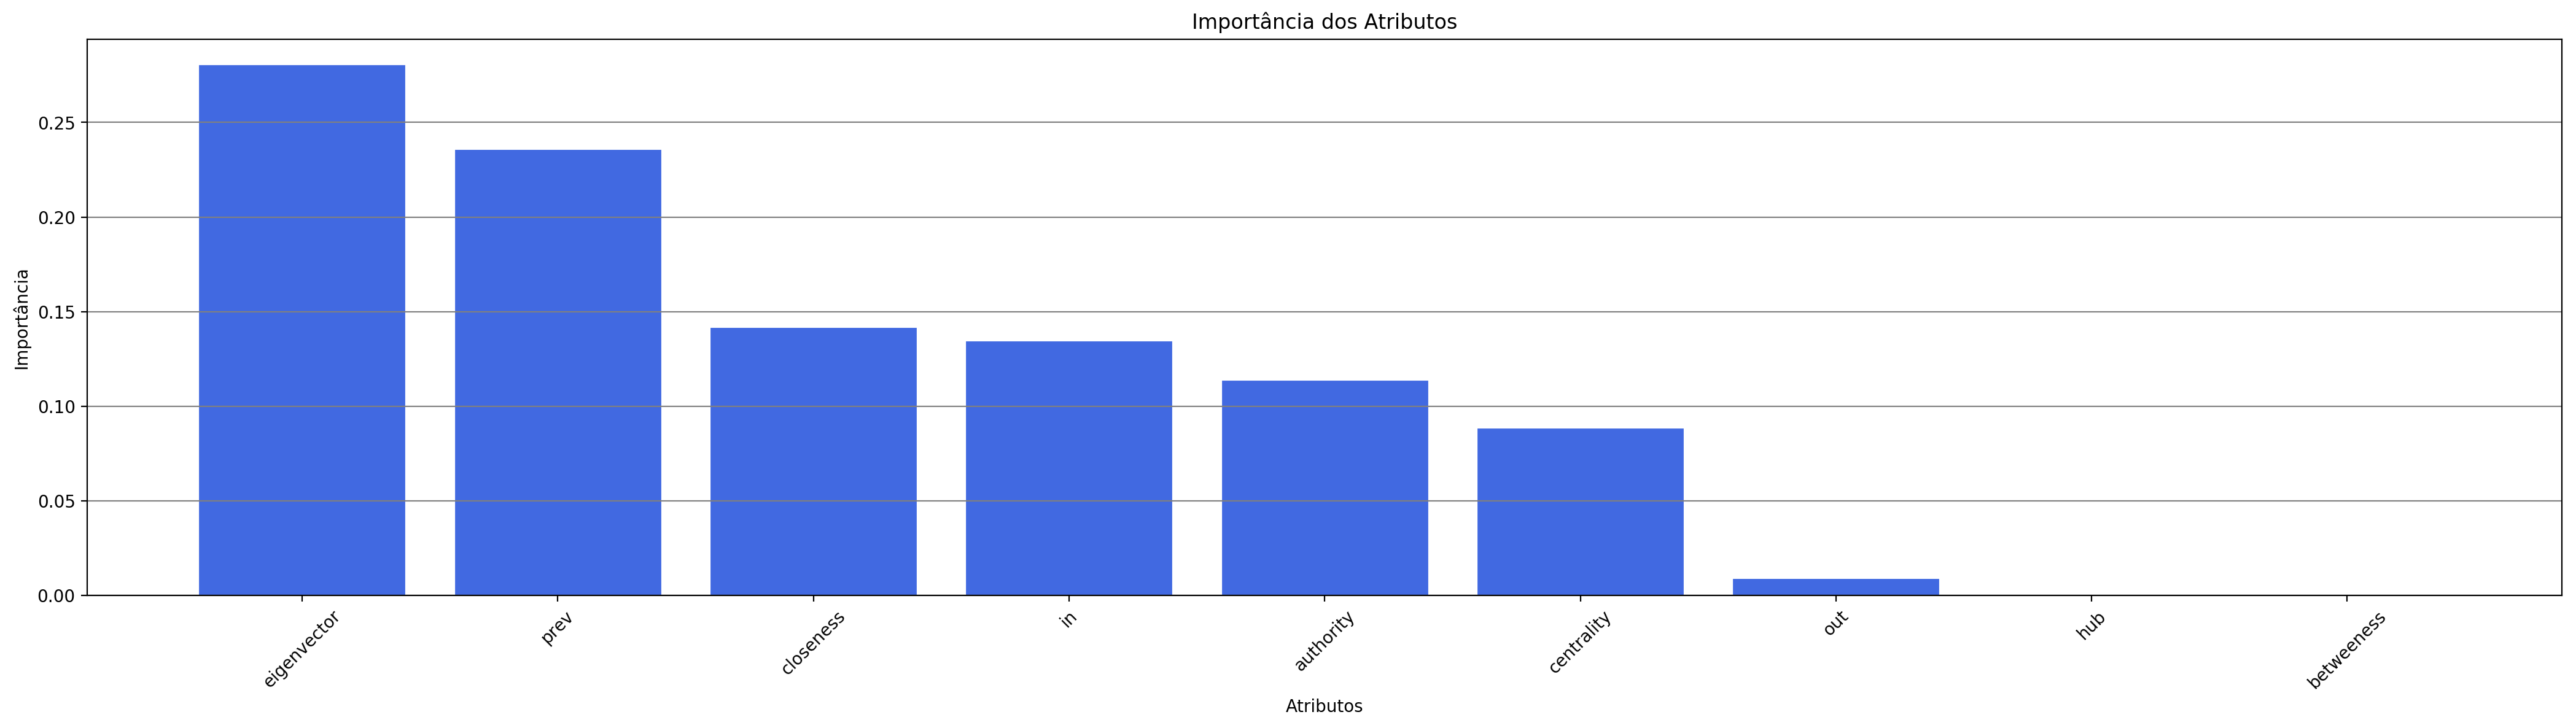

In [54]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.5',linestyle='-', axis='y')
plt.xticks(range(len(indices)), [labels[i] for i in indices])
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.xticks(rotation=45)
plt.show()